# 회귀분석

In [5]:
import numpy as np 

# 가상의 기울기 a와 Y 절편 b (임의의 값)
a, b = 3, 76

# X값과 Y값
data = np.array([[2, 81], 
                 [4, 93], 
                 [6, 91], 
                 [8, 97]])
X = data[:, 0]
Y = data[:, 1]

# MSE 함수
def mse(Y, Y_hat):
    return ((Y - Y_hat) ** 2).mean()

# 예측값을 계산
Y_hat = a * X + b

# 모든 X값을 한 번씩 대입하여 predict_result 리스트 완성 
for i in range(len(X)):
    print(f'공부시간 = {X[i]}, 실제점수 = {Y[i]}, 예측점수 = {Y_hat[i]}')

# 최종 MSE 출력
print('MSE 최종값: ', mse(Y, Y_hat))
                

공부시간 = 2, 실제점수 = 81, 예측점수 = 82
공부시간 = 4, 실제점수 = 93, 예측점수 = 88
공부시간 = 6, 실제점수 = 91, 예측점수 = 94
공부시간 = 8, 실제점수 = 97, 예측점수 = 100
MSE 최종값:  11.0


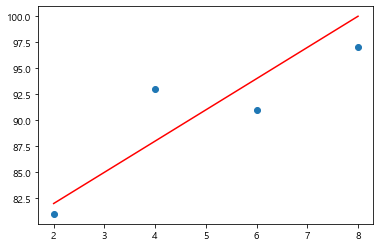

In [36]:
import matplotlib.pyplot as plt
import matplotlib  as mpl

mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = False) # unicode의 음수부호 설정 false

plt.scatter(X, Y)
plt.plot(X, Y_hat, color='red')
plt.show()


## MSE를 최소로하는 a값 찾기

In [46]:
def cost_func(a):
    # 가상의 Y 절편 b (임의의 값)
    b = 76

    # X값과 Y값
    data = np.array([[2, 81], 
                     [4, 93], 
                     [6, 91], 
                     [8, 97]])
    X = data[:, 0]
    Y = data[:, 1]

    # MSE 함수
    def mse(Y, Y_hat):
        return ((Y - Y_hat) ** 2).mean()

    # 예측값을 계산
    Y_hat = a * X + b

    # # 모든 X값을 한 번씩 대입하여 predict_result 리스트 완성 
    # for i in range(len(X)):
    #     print(f'공부시간 = {X[i]}, 실제점수 = {Y[i]}, 예측점수 = {Y_hat[i]}')

    # 최종 MSE 출력
    # print('MSE 최종값: ', mse(Y, Y_hat))
    
    return mse(Y, Y_hat)
    

In [59]:
a_lst = np.linspace(-2, 7, 50)
mse_lst = [cost_func(a) for a in a_lst]

mini = np.argmin(mse_lst)
mina = a_lst[mini]

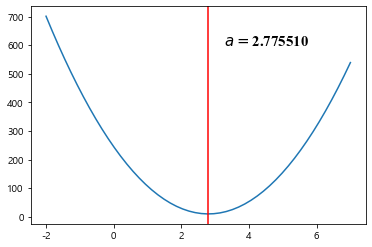

In [60]:
fontset = {'family': 'Times New Roman',
           'weight': 'bold',
           'size': 15}

plt.plot(a_lst, mse_lst)
plt.axvline(mina,0,1,color='red')
plt.text(mina + 0.5, 600, r'$a=$%f' %(mina), fontdict=fontset)
plt.show()

## 경사하강법

In [44]:
from sympy import symbols, diff, factor
y_i, x_i, a, b = symbols('y_i x_i a b')
m = ((y_i - (a * x_i + b)) ** 2)
m

(-a*x_i - b + y_i)**2

In [41]:
diff(m, a)

-2*x_i*(-a*x_i - b + y_i)

In [45]:
factor(diff(m, b))

2*(a*x_i + b - y_i)

epoch=0, 기울기(a)=27.8400, 절편(b)=5.4300, Cost(MSE)=8225.0000
epoch=1, 기울기(a)=3.9390, 절편(b)=2.1822, Cost(MSE)=6199.8149
epoch=2, 기울기(a)=24.0341, 절편(b)=6.2996, Cost(MSE)=4730.8203
epoch=3, 기울기(a)=6.7228, 절편(b)=4.1414, Cost(MSE)=3664.0244
epoch=4, 기울기(a)=21.2193, 절편(b)=7.3060, Cost(MSE)=2888.0952
epoch=100, 기울기(a)=7.0739, 절편(b)=50.5117, Cost(MSE)=146.2553
epoch=200, 기울기(a)=4.0960, 절편(b)=68.2822, Cost(MSE)=27.8259
epoch=300, 기울기(a)=2.9757, 절편(b)=74.9678, Cost(MSE)=11.0637
epoch=400, 기울기(a)=2.5542, 절편(b)=77.4830, Cost(MSE)=8.6912
epoch=500, 기울기(a)=2.3956, 절편(b)=78.4293, Cost(MSE)=8.3554
epoch=600, 기울기(a)=2.3360, 절편(b)=78.7853, Cost(MSE)=8.3078
epoch=700, 기울기(a)=2.3135, 절편(b)=78.9192, Cost(MSE)=8.3011
epoch=800, 기울기(a)=2.3051, 절편(b)=78.9696, Cost(MSE)=8.3002
epoch=900, 기울기(a)=2.3019, 절편(b)=78.9886, Cost(MSE)=8.3000
epoch=1000, 기울기(a)=2.3007, 절편(b)=78.9957, Cost(MSE)=8.3000


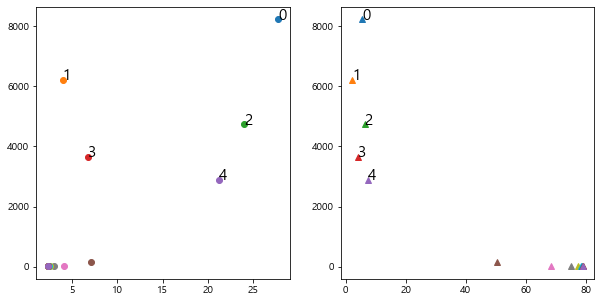

In [97]:
# 경사하강법 코딩 시작
import matplotlib.pyplot as plt
import matplotlib  as mpl

mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = False) # unicode의 음수부호 설정 false

# X, Y
X = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# init
a, b = 0, 0

# learning rate 
lr = 0.03

# settings 
epochs = 1001
a_lst = []
b_lst = []
MSE_lst = []

fig = plt.figure(figsize=(10, 5))

for i in range(epochs):
    y_hat = b + a * X
    err = y - y_hat
    MSE = (err ** 2).mean()

    dMSE_da = 2 * (-err * X).mean()
    dMSE_db = 2 * (-err).mean()

    a = a - lr * dMSE_da
    b = b - lr * dMSE_db
    
    a_lst.append(a)
    b_lst.append(b)
    MSE_lst.append(MSE)
    
    # if i % 100 == 0:
    #     print('epoch=%.f, 기울기(a)=%.04f, 절편(b)=%.04f, Cost(MSE)=%.04f' %(i, a, b, MSE))
        
    if i < 5 or i % 100 == 0:
        print('epoch=%.f, 기울기(a)=%.04f, 절편(b)=%.04f, Cost(MSE)=%.04f' %(i, a, b, MSE))
        plt.subplot(121)
        plt.plot(a, MSE, 'o')
        if i < 5:
            plt.text(a + 1, MSE + 1, i, fontdict={'size' : 15})
            
        plt.subplot(122)
        plt.plot(b, MSE, '^')
        if i < 5:
            plt.text(b, MSE + 1, i, fontdict={'size' : 15})


plt.show()



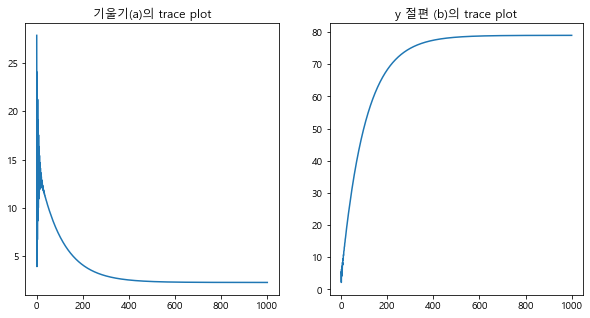

In [102]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(a_lst)
plt.title('기울기(a)의 trace plot')

plt.subplot(122)
plt.plot(b_lst)
plt.title('y 절편 (b)의 trace plot')
plt.show()


## Pollution 데이터 분석

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl

mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = False) # unicode의 음수부호 설정 false

In [2]:
data = pd.read_csv('data/pollution.csv')

X = data['input']
y = data['pollution']
data.head(5)

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897
3,0.233770,3.586844
4,0.283235,3.678243


### EDA

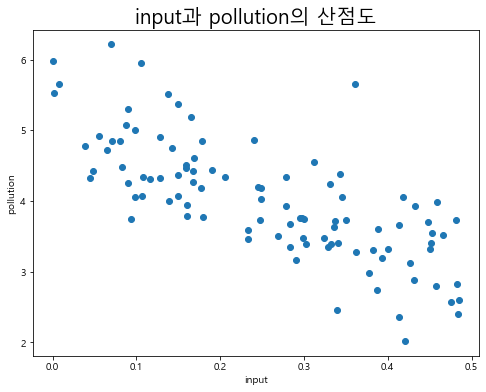

In [3]:
# figure 전체 설정 
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize = (8, 6))

plt.scatter(X, y)
plt.title('input과 pollution의 산점도', size=20)
plt.xlabel('input')
plt.ylabel('pollution')
plt.show()

### Regression 

기울기(a) > -4.5445, y 절편(b) > 5.1755
LSE method에서 MSE > 0.3097239682341082


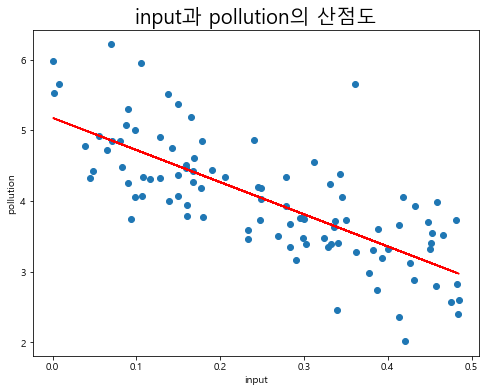

In [4]:
# LSE method 

## function
def LSE(y, X):
    ybar = y.mean()
    Xbar = X.mean()
    
    numer = ((X - Xbar) * (y - ybar)).sum()
    denom = ((X - Xbar) ** 2).sum()
    
    a = numer / denom 
    b = ybar - a * Xbar
    
    return a, b

## LSE
a, b = LSE(y, X)
yhat = b + a * X
err = y - yhat
MSE = (err ** 2).mean()
print('기울기(a) > %.04f, y 절편(b) > %.04f' %(a, b))
print('LSE method에서 MSE >', MSE)

## Plot
fig = plt.figure(figsize = (8, 6))

plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.title('input과 pollution의 산점도', size=20)
plt.xlabel('input')
plt.ylabel('pollution')
plt.show()

In [5]:
# Gradient descent method

## settings
a, b = 0, 0                          # init value
epochs = 5001                           # repeat
lr = 0.03                               # learning rate(step size)
a_lst, b_lst, MSE_lst = [], [], []

## For Loop
for i in range(epochs):
    ### calculate MSE
    yhat = b + a * X
    err = y - yhat 
    MSE = (err ** 2).mean()
    
    ### derivative
    pMSE_pa = 2 * (-err * X).mean()
    pMSE_pb = 2 * (-err).mean()
    
    ## update a, b
    a = a - lr * pMSE_pa
    b = b - lr * pMSE_pb
    
    a_lst.append(a)
    b_lst.append(b)
    MSE_lst.append(MSE)
    
    if i < 5 or i % 500 == 0:
        print('epoch=%.f, 기울기(a)=%.04f, 절편(b)=%.04f, Cost(MSE)=%.04f' %(i, a, b, MSE))

epoch=0, 기울기(a)=0.0561, 절편(b)=0.2412, Cost(MSE)=16.8682
epoch=1, 기울기(a)=0.1082, 절편(b)=0.4671, Cost(MSE)=14.8893
epoch=2, 기울기(a)=0.1566, 절편(b)=0.6786, Cost(MSE)=13.1552
epoch=3, 기울기(a)=0.2016, 절편(b)=0.8767, Cost(MSE)=11.6357
epoch=4, 기울기(a)=0.2433, 절편(b)=1.0622, Cost(MSE)=10.3042
epoch=500, 기울기(a)=-1.3387, 절편(b)=4.3455, Cost(MSE)=0.5079
epoch=1000, 기울기(a)=-2.6790, 절편(b)=4.6925, Cost(MSE)=0.3768
epoch=1500, 기울기(a)=-3.4589, 절편(b)=4.8944, Cost(MSE)=0.3325
epoch=2000, 기울기(a)=-3.9127, 절편(b)=5.0119, Cost(MSE)=0.3174
epoch=2500, 기울기(a)=-4.1769, 절편(b)=5.0803, Cost(MSE)=0.3123
epoch=3000, 기울기(a)=-4.3306, 절편(b)=5.1201, Cost(MSE)=0.3106
epoch=3500, 기울기(a)=-4.4200, 절편(b)=5.1433, Cost(MSE)=0.3100
epoch=4000, 기울기(a)=-4.4720, 절편(b)=5.1567, Cost(MSE)=0.3098
epoch=4500, 기울기(a)=-4.5023, 절편(b)=5.1646, Cost(MSE)=0.3098
epoch=5000, 기울기(a)=-4.5200, 절편(b)=5.1692, Cost(MSE)=0.3097


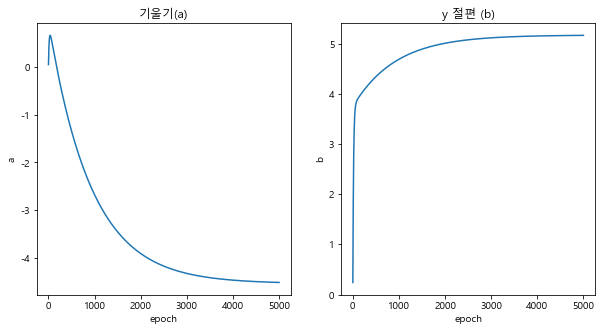

In [7]:
## Plot1
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(a_lst)
plt.title('기울기(a)')
plt.xlabel('epoch')
plt.ylabel('a')

plt.subplot(122)
plt.plot(b_lst)
plt.title('y 절편 (b)')
plt.xlabel('epoch')
plt.ylabel('b')
plt.show()

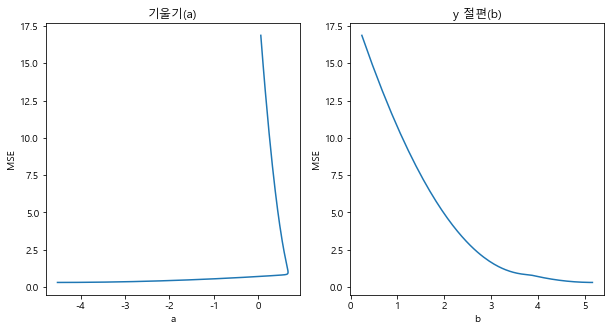

In [8]:
# Plot 2
fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(a_lst, MSE_lst)
plt.title('기울기(a)')
plt.xlabel('a')
plt.ylabel('MSE')

plt.subplot(122)
plt.plot(b_lst, MSE_lst)
plt.title('y 절편(b)')
plt.xlabel('b')
plt.ylabel('MSE')
plt.show()

In [11]:
# Functions
def GD(y, X, init=[0,0], epochs=2001, lr=0.03):
    a, b = init

    a_lst, b_lst, MSE_lst = [], [], []

    for i in range(epochs):
        ### calculate MSE
        yhat = b + a * X
        err = y - yhat 
        MSE = (err ** 2).mean()
        
        ### derivative
        pMSE_pa = 2 * (-err * X).mean()
        pMSE_pb = 2 * (-err).mean()
        
        ## update a, b
        a = a - lr * pMSE_pa
        b = b - lr * pMSE_pb
        
        a_lst.append(a)
        b_lst.append(b)
        MSE_lst.append(MSE)
        
        if i < 5 or i % 500 == 0:
            print('epoch=%.f, 기울기(a)=%.04f, 절편(b)=%.04f, Cost(MSE)=%.04f' %(i, a, b, MSE))

    return a_lst, b_lst, MSE_lst


In [12]:
# Plot Functions
def trace_plot(a_lst, b_lst):
  ## Plot1
  fig = plt.figure(figsize=(10, 5))
  plt.subplot(121)
  plt.plot(a_lst)
  plt.title('slope (a)')
  plt.xlabel('epoch')
  plt.ylabel('a')

  plt.subplot(122)
  plt.plot(b_lst)
  plt.title('y intercept (b)')
  plt.xlabel('epoch')
  plt.ylabel('b')
  plt.show()

def MSE_plot(a_lst, b_lst, MSE_lst):
  # Plot 2
  fig = plt.figure(figsize=(10, 5))

  plt.subplot(121)
  plt.plot(a_lst, MSE_lst)
  plt.title('slope (a)')
  plt.xlabel('a')
  plt.ylabel('MSE')

  plt.subplot(122)
  plt.plot(b_lst, MSE_lst)
  plt.title('y intercept (b)')
  plt.xlabel('b')
  # plt.ylabel('MSE')
  plt.show()

epoch=0, 기울기(a)=0.0187, 절편(b)=0.0804, Cost(MSE)=16.8682
epoch=1, 기울기(a)=0.0369, 절편(b)=0.1591, Cost(MSE)=16.1940
epoch=2, 기울기(a)=0.0548, 절편(b)=0.2361, Cost(MSE)=15.5483
epoch=3, 기울기(a)=0.0722, 절편(b)=0.3115, Cost(MSE)=14.9298
epoch=4, 기울기(a)=0.0892, 절편(b)=0.3853, Cost(MSE)=14.3373
epoch=500, 기울기(a)=0.0583, 절편(b)=3.9837, Cost(MSE)=0.7178
epoch=1000, 기울기(a)=-0.7014, 절편(b)=4.1805, Cost(MSE)=0.5942
epoch=1500, 기울기(a)=-1.3358, 절편(b)=4.3447, Cost(MSE)=0.5080
epoch=2000, 기울기(a)=-1.8654, 절편(b)=4.4819, Cost(MSE)=0.4480
epoch=2500, 기울기(a)=-2.3077, 절편(b)=4.5964, Cost(MSE)=0.4061
epoch=3000, 기울기(a)=-2.6769, 절편(b)=4.6920, Cost(MSE)=0.3769
epoch=3500, 기울기(a)=-2.9852, 절편(b)=4.7718, Cost(MSE)=0.3566
epoch=4000, 기울기(a)=-3.2426, 절편(b)=4.8384, Cost(MSE)=0.3424
epoch=4500, 기울기(a)=-3.4575, 절편(b)=4.8941, Cost(MSE)=0.3325
epoch=5000, 기울기(a)=-3.6369, 절편(b)=4.9405, Cost(MSE)=0.3256


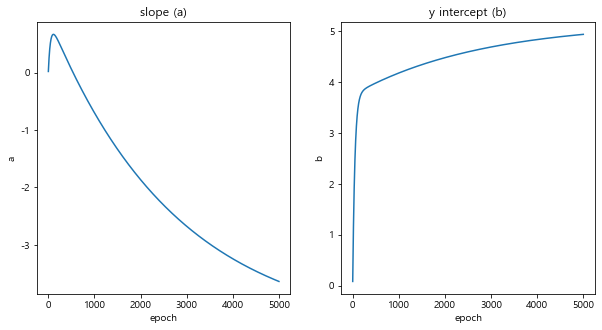

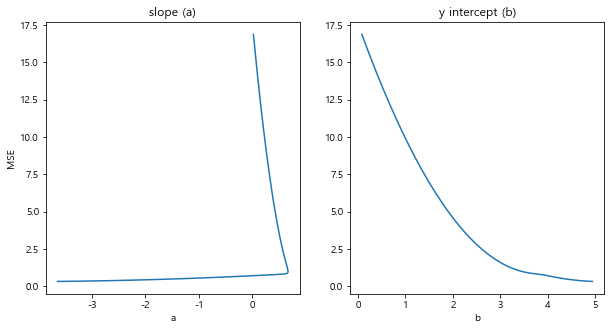

In [13]:
# learning rate = 0.01
a_lst, b_lst, MSE_lst = GD(y, X, epochs=5001, lr=0.01)

trace_plot(a_lst, b_lst)
MSE_plot(a_lst, b_lst, MSE_lst)

epoch=0, 기울기(a)=0.1122, 절편(b)=0.4824, Cost(MSE)=16.8682
epoch=1, 기울기(a)=0.2085, 절편(b)=0.9035, Cost(MSE)=13.0410
epoch=2, 기울기(a)=0.2910, 절편(b)=1.2712, Cost(MSE)=10.1297
epoch=3, 기울기(a)=0.3614, 절편(b)=1.5922, Cost(MSE)=7.9148
epoch=4, 기울기(a)=0.4214, 절편(b)=1.8725, Cost(MSE)=6.2297
epoch=500, 기울기(a)=-2.6821, 절편(b)=4.6933, Cost(MSE)=0.3768
epoch=1000, 기울기(a)=-3.9142, 절편(b)=5.0123, Cost(MSE)=0.3174
epoch=1500, 기울기(a)=-4.3312, 절편(b)=5.1203, Cost(MSE)=0.3106
epoch=2000, 기울기(a)=-4.4723, 절편(b)=5.1568, Cost(MSE)=0.3098
epoch=2500, 기울기(a)=-4.5201, 절편(b)=5.1692, Cost(MSE)=0.3097
epoch=3000, 기울기(a)=-4.5362, 절편(b)=5.1734, Cost(MSE)=0.3097
epoch=3500, 기울기(a)=-4.5417, 절편(b)=5.1748, Cost(MSE)=0.3097
epoch=4000, 기울기(a)=-4.5436, 절편(b)=5.1753, Cost(MSE)=0.3097
epoch=4500, 기울기(a)=-4.5442, 절편(b)=5.1754, Cost(MSE)=0.3097
epoch=5000, 기울기(a)=-4.5444, 절편(b)=5.1755, Cost(MSE)=0.3097


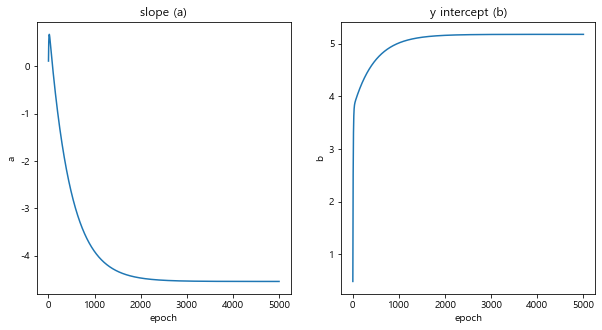

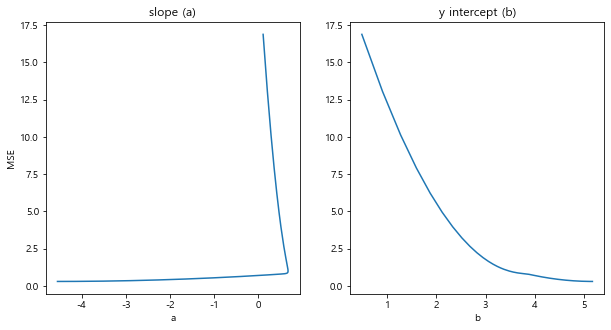

In [14]:
# learning rate = 0.06
a_lst, b_lst, MSE_lst = GD(y, X, epochs=5001, lr=0.06)

trace_plot(a_lst, b_lst)
MSE_plot(a_lst, b_lst, MSE_lst)

epoch=0, 기울기(a)=0.1682, 절편(b)=0.7236, Cost(MSE)=16.8682
epoch=1, 기울기(a)=0.3008, 절편(b)=1.3093, Cost(MSE)=11.3234
epoch=2, 기울기(a)=0.4046, 절편(b)=1.7835, Cost(MSE)=7.7008
epoch=3, 기울기(a)=0.4851, 절편(b)=2.1676, Cost(MSE)=5.3336
epoch=4, 기울기(a)=0.5469, 절편(b)=2.4788, Cost(MSE)=3.7863
epoch=500, 기울기(a)=-3.4631, 절편(b)=4.8955, Cost(MSE)=0.3324
epoch=1000, 기울기(a)=-4.3318, 절편(b)=5.1204, Cost(MSE)=0.3106
epoch=1500, 기울기(a)=-4.5027, 절편(b)=5.1647, Cost(MSE)=0.3098
epoch=2000, 기울기(a)=-4.5363, 절편(b)=5.1734, Cost(MSE)=0.3097
epoch=2500, 기울기(a)=-4.5429, 절편(b)=5.1751, Cost(MSE)=0.3097
epoch=3000, 기울기(a)=-4.5442, 절편(b)=5.1754, Cost(MSE)=0.3097
epoch=3500, 기울기(a)=-4.5444, 절편(b)=5.1755, Cost(MSE)=0.3097
epoch=4000, 기울기(a)=-4.5445, 절편(b)=5.1755, Cost(MSE)=0.3097
epoch=4500, 기울기(a)=-4.5445, 절편(b)=5.1755, Cost(MSE)=0.3097
epoch=5000, 기울기(a)=-4.5445, 절편(b)=5.1755, Cost(MSE)=0.3097


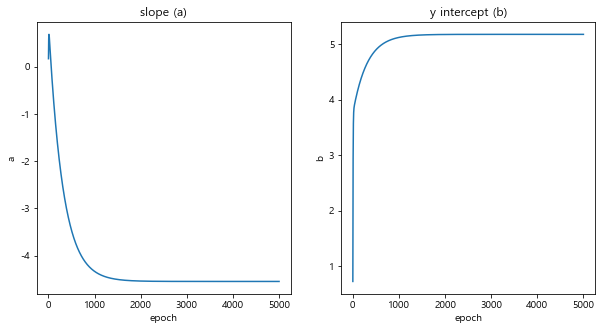

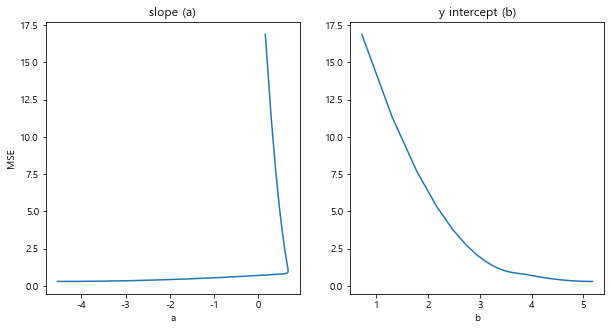

In [15]:
# learning rate = 0.09
a_lst, b_lst, MSE_lst = GD(y, X, epochs=5001, lr=0.09)

trace_plot(a_lst, b_lst)
MSE_plot(a_lst, b_lst, MSE_lst)

## sklearn 사용

In [16]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from sklearn import linear_model 

lin_data = pd.read_csv('data/pollution.csv')

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]

regr = linear_model.LinearRegression()
regr.fit(x, y)

print(type(regr))

<class 'sklearn.linear_model._base.LinearRegression'>


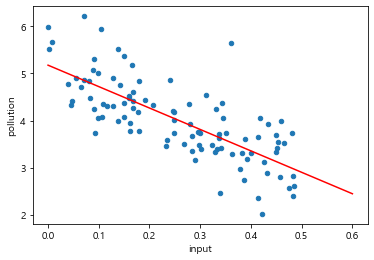

In [17]:
lin_data.plot(kind='scatter', x='input', y='pollution')
y_pred = regr.predict([[0], [0.6]])
plt.plot([0, 0.6], y_pred, 'r')
plt.show()

In [ ]:
regr?

## 다중선형회귀분석

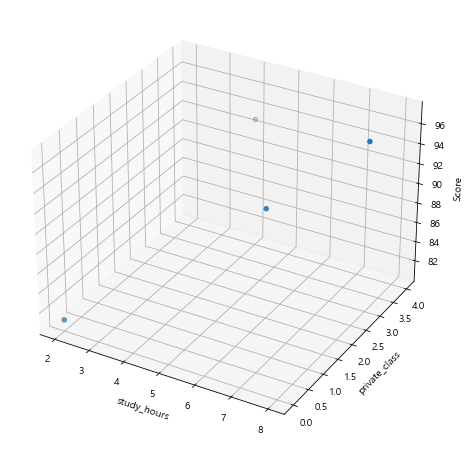

In [18]:
data = np.array([[2, 0, 81], 
                 [4, 4, 93], 
                 [6, 2, 91], 
                 [8, 3, 97]])
x1 = data[:,0]
x2 = data[:,1]
y = data[:,2]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
plt.show()

In [19]:
# Gradient descent method

## settings
a1, a2, b = 0, 0, 0                       # init value
epochs = 3001                             # repeat
lr = 0.02                                 # learning rate(step size)
a1_lst, a2_lst, b_lst, MSE_lst = [], [], [], []

## For Loop
for i in range(epochs):
    ### calculate MSE
    yhat = b + a1 * x1 + a2 * x2
    err = y - yhat 
    MSE = (err ** 2).mean()
    
    ### derivative
    pMSE_pa1 = 2 * (-err * x1).mean()
    pMSE_pa2 = 2 * (-err * x2).mean()
    pMSE_pb = 2 * (-err).mean()
    
    ## update a, b
    a1 = a1 - lr * pMSE_pa1
    a2 = a2 - lr * pMSE_pa2
    b = b - lr * pMSE_pb
    
    a1_lst.append(a1)
    a2_lst.append(a2)
    b_lst.append(b)
    MSE_lst.append(MSE)
    
    if i < 5 or i % 500 == 0:
        print('epoch=%.f, x1 기울기(a1)=%.04f, x2 기울기(a2)=%.04f, 절편(b)=%.04f, Cost(MSE)=%.04f' %(i, a1, a2, b, MSE))

epoch=0, x1 기울기(a1)=18.5600, x2 기울기(a2)=8.4500, 절편(b)=3.6200, Cost(MSE)=8225.0000
epoch=1, x1 기울기(a1)=9.7300, x2 기울기(a2)=4.4725, 절편(b)=2.6227, Cost(MSE)=2528.1100
epoch=2, x1 기울기(a1)=13.7638, x2 기울기(a2)=6.3298, 절편(b)=3.7893, Cost(MSE)=1262.7361
epoch=3, x1 기울기(a1)=11.7579, x2 기울기(a2)=5.4460, 절편(b)=3.9353, Cost(MSE)=974.7542
epoch=4, x1 기울기(a1)=12.5895, x2 기울기(a2)=5.8484, 절편(b)=4.5561, Cost(MSE)=902.4294
epoch=500, x1 기울기(a1)=1.9546, x2 기울기(a2)=2.4427, 절편(b)=74.7362, Cost(MSE)=1.6734
epoch=1000, x1 기울기(a1)=1.5189, x2 기울기(a2)=2.2922, 절편(b)=77.7277, Cost(MSE)=0.0742
epoch=1500, x1 기울기(a1)=1.5008, x2 기울기(a2)=2.2860, 절편(b)=77.8518, Cost(MSE)=0.0714
epoch=2000, x1 기울기(a1)=1.5000, x2 기울기(a2)=2.2857, 절편(b)=77.8569, Cost(MSE)=0.0714
epoch=2500, x1 기울기(a1)=1.5000, x2 기울기(a2)=2.2857, 절편(b)=77.8571, Cost(MSE)=0.0714
epoch=3000, x1 기울기(a1)=1.5000, x2 기울기(a2)=2.2857, 절편(b)=77.8571, Cost(MSE)=0.0714


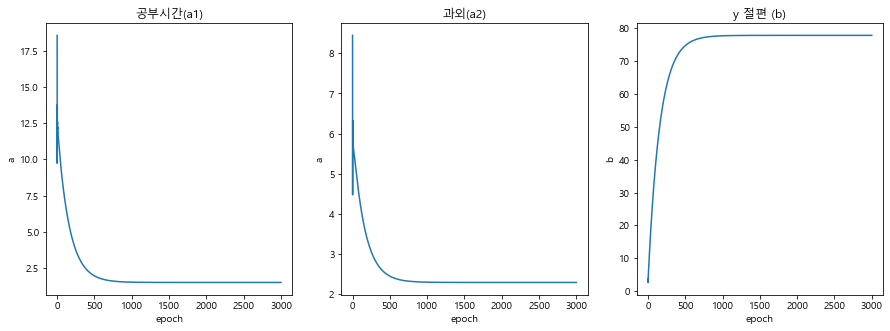

In [20]:
## Plot1
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(a1_lst)
plt.title('공부시간(a1)')
plt.xlabel('epoch')
plt.ylabel('a')

plt.subplot(132)
plt.plot(a2_lst)
plt.title('과외(a2)')
plt.xlabel('epoch')
plt.ylabel('a')

plt.subplot(133)
plt.plot(b_lst)
plt.title('y 절편 (b)')
plt.xlabel('epoch')
plt.ylabel('b')
plt.show()

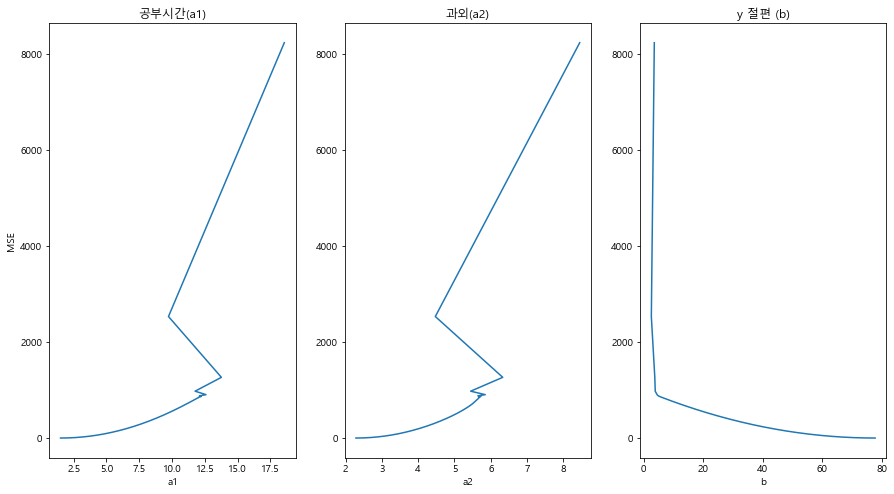

In [21]:
# Plot 2
fig = plt.figure(figsize=(15, 8))

plt.subplot(131)
plt.plot(a1_lst, MSE_lst)
plt.title('공부시간(a1)')
plt.xlabel('a1')
plt.ylabel('MSE')

plt.subplot(132)
plt.plot(a2_lst, MSE_lst)
plt.title('과외(a2)')
plt.xlabel('a2')

plt.subplot(133)
plt.plot(b_lst, MSE_lst)
plt.title('y 절편 (b)')
plt.xlabel('epoch')
plt.xlabel('b')
plt.show()